Answer **1**

In [ ]:
class Search:
  def searchMatrix(self, matrix: List[List[int]], target:int) -> bool:
    ROWS, COLS = len(matrix), len(matrix[0])

    top, bot =0, ROWS - 1
    while top <= bot:
      row = (top + bot) // 2
      if target > matrix[row][-1]:
        top = row + 1
      elif target <matrix[row][0]:
        bot = row - 1
      else:
        break

    if not (top <= bot):
      return False

    row = (top + bot) // 2
    l,r = 0, COLS - 1

    while l <= r:
      m = (l + r) // 2
      if target > matrix[row][m]:
        l = m + 1
      elif target < matrix[row][m]:
        r = m - 1
      else:
        return True
    return False

**Answer 2**

In [ ]:
input_str = input ("Enter a sentence:")
l = input_str.split()
d = {}

for i in l:
  d[i] = d.get(i,0) + 1
print(d)

Enter a sentence:hi hello hello
{'hi': 1, 'hello': 2}


# **Machine Learning**

**Answer 1**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor


In [12]:
from google.colab import files


uploaded = files.upload()

Saving instagram_reach.csv to instagram_reach.csv


In [16]:

data = pd.read_csv("instagram_reach.csv")
print(data.head())

   Unnamed: 0  S.No              USERNAME  \
0           0     1         mikequindazzi   
1           1     2       drgorillapaints   
2           2     3    aitrading_official   
3           3     4  opensourcedworkplace   
4           4     5           crea.vision   

                                             Caption  Followers  \
0  Who are #DataScientist and what do they do? >>...       1600   
1  We all know where it’s going. We just have to ...        880   
2  Alexander Barinov: 4 years as CFO in multinati...        255   
3                                               sfad        340   
4  Ever missed a call while your phone was chargi...        304   

                                            Hashtags Time since posted  Likes  
0  #MachineLearning #AI #DataAnalytics #DataScien...          11 hours    139  
1   #deck .#mac #macintosh#sayhello #apple #steve...           2 hours     23  
2  #whoiswho #aitrading #ai #aitradingteam#instat...           2 hours     25  
3  #io

In [17]:
data.isnull().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [20]:
data = data.dropna()

In [21]:
data.isnull().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              0
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         94 non-null     int64 
 1   S.No               94 non-null     int64 
 2   USERNAME           94 non-null     object
 3   Caption            94 non-null     object
 4   Followers          94 non-null     int64 
 5   Hashtags           94 non-null     object
 6   Time since posted  94 non-null     object
 7   Likes              94 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 6.6+ KB


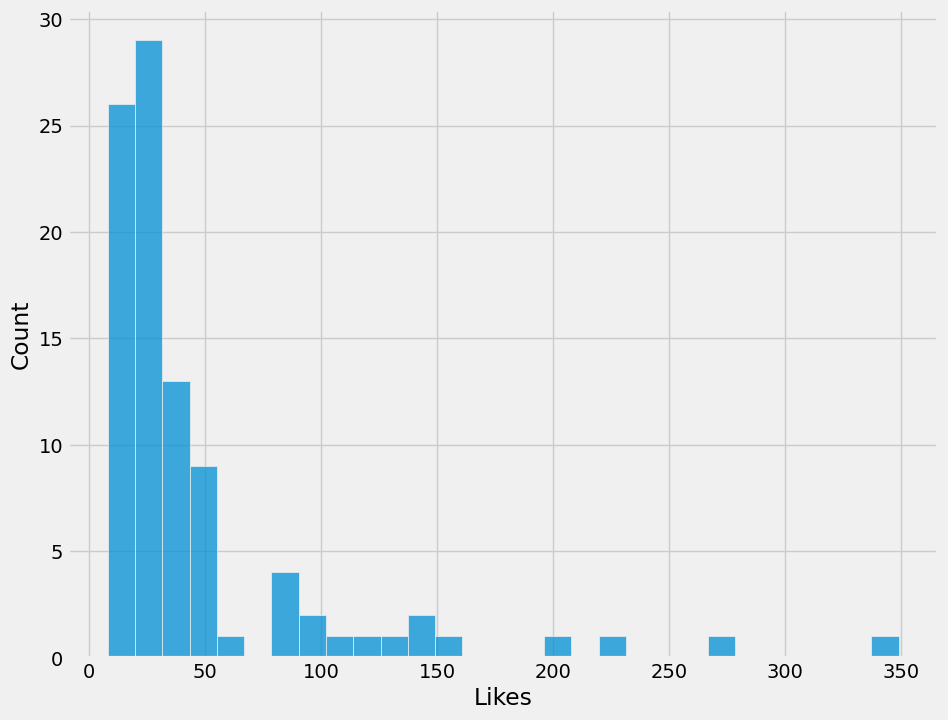

In [29]:
plt.figure(figsize=(10, 8))
sns.histplot(data["Likes"])
plt.show()

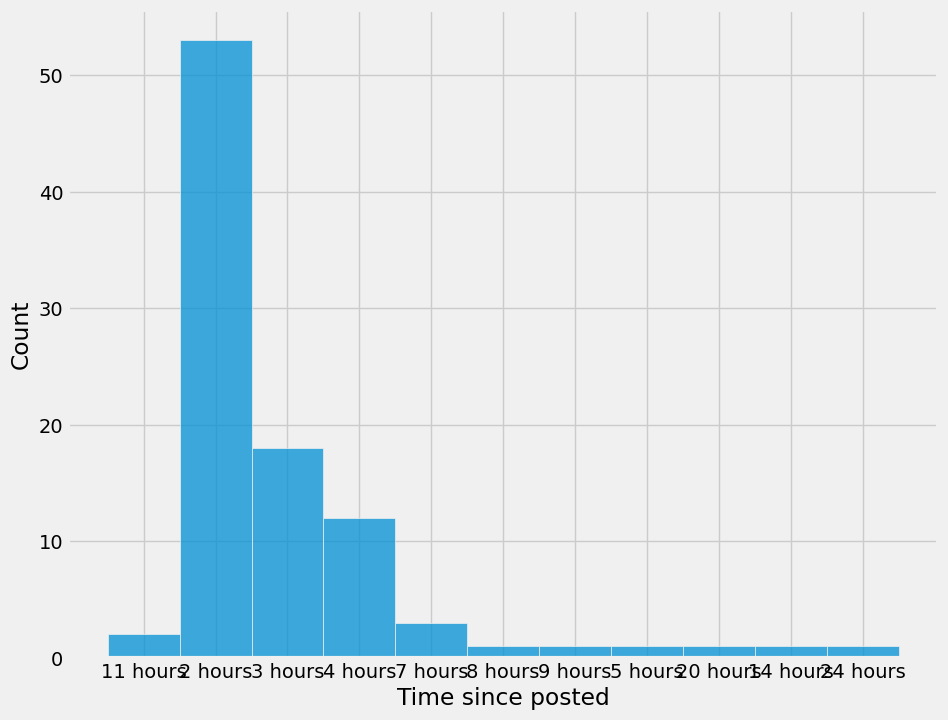

In [30]:
plt.figure(figsize=(10, 8))
sns.histplot(data["Time since posted"])
plt.show()

In [34]:
data

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30
...,...,...,...,...,...,...,...,...
95,8,19,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3 hours,31
96,9,21,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3 hours,42
97,10,22,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3 hours,10
98,11,24,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3 hours,222


In [35]:
data.columns

Index(['Unnamed: 0', 'S.No', 'USERNAME', 'Caption', 'Followers', 'Hashtags',
       'Time since posted', 'Likes'],
      dtype='object')

In [36]:
data= data.drop(['Unnamed: 0', 'S.No'], axis=1)

In [37]:
data.columns

Index(['USERNAME', 'Caption', 'Followers', 'Hashtags', 'Time since posted',
       'Likes'],
      dtype='object')

<ipython-input-40-da301fa31bfb>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




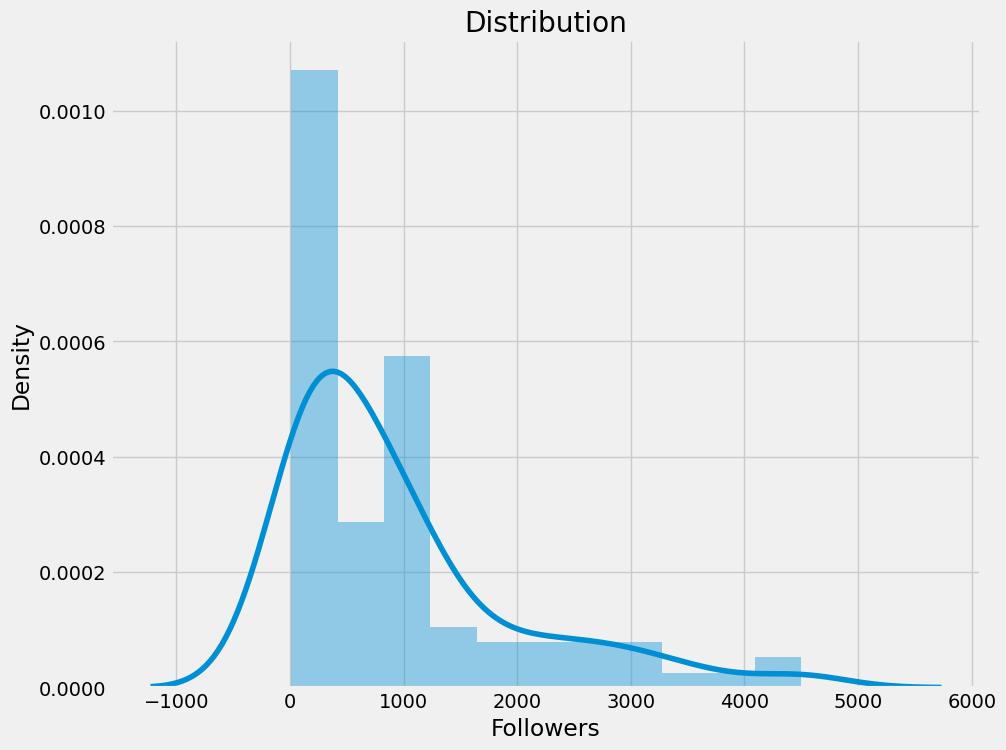

In [40]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution")
sns.distplot(data['Followers'])
plt.show()

<ipython-input-39-feb97f73abaf>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




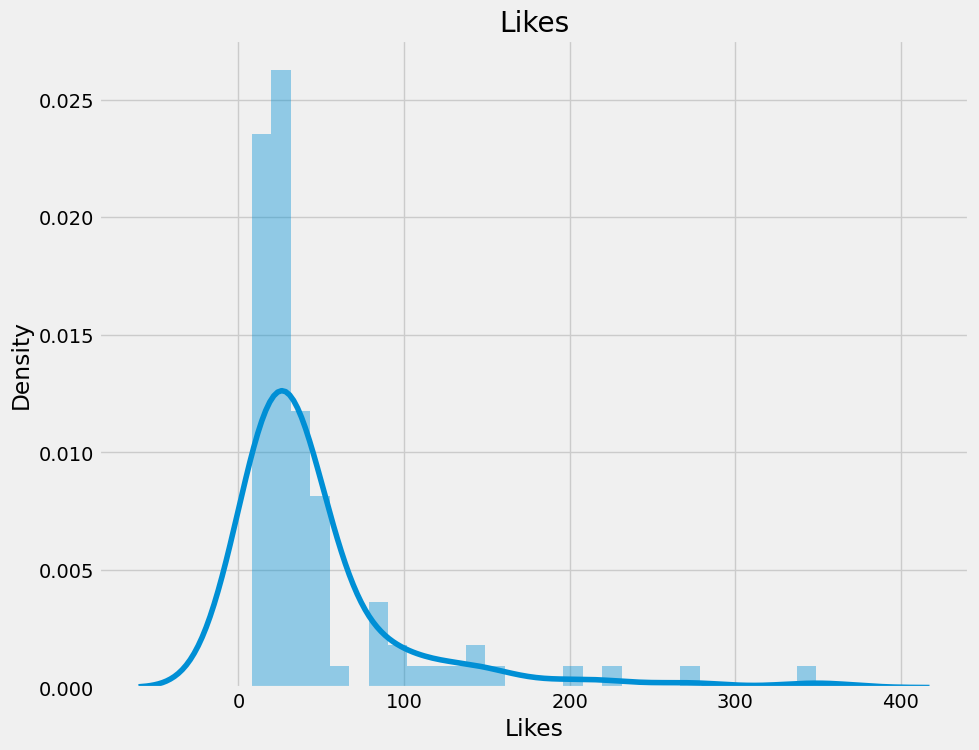

In [39]:
plt.figure(figsize=(10, 8))
plt.title("Likes")
sns.distplot(data['Likes'])
plt.show()

In [42]:
followers = data["Followers"].sum()
likes = data["Likes"].sum()

labels = ['Followers', 'Likes']
values = [followers, likes]

fig = px.pie(data, values=values, names=labels,
             title='followers and likes', hole=0.5)
fig.show()

In [44]:

figure = px.scatter(data_frame = data, x="Likes",
                    y="Followers", trendline="ols",
                    title = "likes, followers relationship")
figure.show()

In [45]:
features = ['USERNAME', 'Caption', 'Hashtags', 'Followers']
target_likes = 'Likes'
target_time_since_posted = 'Time since posted'

In [50]:
X = data[features]
y_likes = data[target_likes]
y_time_since_posted = data[target_time_since_posted]
X_train, X_test, y_likes_train, y_likes_test, y_time_since_posted_train, y_time_since_posted_test = train_test_split(X, y_likes, y_time_since_posted, test_size=0.2, random_state=42)

In [53]:
from sklearn.preprocessing import OneHotEncoder

In [54]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [58]:
def extract_numerical_value(time_string):
    numerical_value = re.findall(r'\d+', time_string)[0]
    return int(numerical_value)

In [59]:
y_time_since_posted_train = y_time_since_posted_train.apply(extract_numerical_value)
y_time_since_posted_test = y_time_since_posted_test.apply(extract_numerical_value)

In [ ]:
time_since_posted_model = LinearRegression()
time_since_posted_model.fit(X_train_encoded, y_time_since_posted_train)
time_since_posted_predictions = time_since_posted_model.predict(X_test_encoded)
time_since_posted_mse = mean_squared_error(y_time_since_posted_test, time_since_posted_predictions)
print("Mean Squared Error (Time Since Posted):", time_since_posted_mse)

**Answer 2**

Machine learning has vast implementation,, even more than we can observe. I am trying to list out some of them that I can observe. For more - Google

Voice Assistant & chat bots : The voice assistants like Google Now, Siri and Cortana are basically an implementation of NLP - Natural Language processing which is a part of Machine Learning.
CPU player game : Not largely but in the present time most logical games are preferred to be made by Machine Learning rather programming.
Social Networks : Have you ever wondered how Facebook suggest friends with awesome accuracy - Machine Learning.
Google : Filtering the contents of Google search. Many time what you search may have two or more than two meanings - but it will provide you with the one you need the most according to your past searches and many other parameters which works with machine learning.
Photo recognition : Have you ever wondered how your smartphone front camera detects your face, sometimes tries to predict you age and has a smile shutter to take the photo as you smile.
Weather prediction : Yes, this thing uses ML.
Automation : the automatic robots which are made world wide are implementation of ML.
Jarvis by Mark Zuckerberg : If you don’t know what it is - It’s a Home automation system made by Mark Zuckerberg. Google it. You will surely find it interesting.
There are many more scenarios where Machine Learning is used. I listed all I had in mind. Google for more. :)